176
0.20104
176
0.201034
176
0.201025


/var/folders/qf/r165sqqj3bg9w09803_p4jcw0000gn/T/ipykernel_28008/3020258583.py:90: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar1 = plt.colorbar(im1, shrink=0.6)


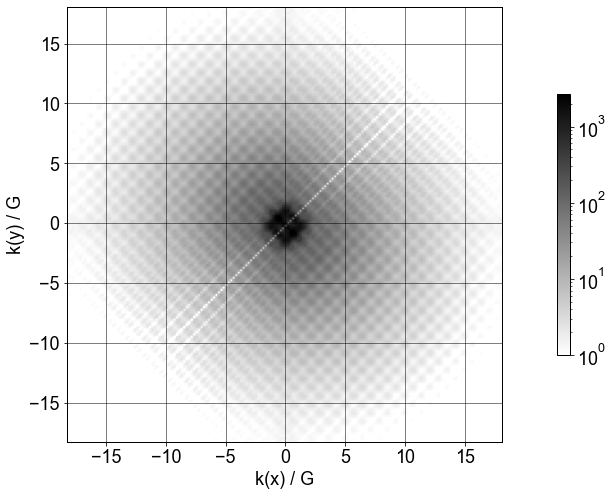

In [12]:
''' This script plots the discrete FFT of a .cub file. 
    The Fourier transform is plotted as a function of kx and ky, with the information
    along the z-direction projected by summing up the contributions along the z-axis
    for each xy-value. 
    The user can choose to normalise the k vectors with respect to the bulk lattice vector.'''

# Python imports 
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift
import matplotlib.colors as colors

# Function to normalise the k vectors with respect to the bulk lattice vector
def grid_normaliser(source, grid_size, grid_spacing, primitive_lattice_vector):
    if source == 'yes':
        freq_x = (np.fft.fftfreq(grid_size_x, d=grid_spacing_x))*(primitive_lattice_vector)
        freq_y = (np.fft.fftfreq(grid_size_y, d=grid_spacing_y))*(primitive_lattice_vector)
    else: 
        freq_x = (np.fft.fftfreq(grid_size_x, d=grid_spacing_x))*(2*np.pi)
        freq_y = (np.fft.fftfreq(grid_size_y, d=grid_spacing_y))*(2*np.pi)

    return freq_x, freq_y

is_normalised = input("Do you want to normalise the k vectors with respect to the bulk lattice vector? (yes/no): ")

if is_normalised == "yes":
    primitive_lattice_vector = float(input("Primitive lattice vector in atomic units:"))
else:
    primitive_lattice_vector = None

cub_file1 = input("Enter the file path for your .cub file: ")

# Read the .cub file
with open(cub_file1, 'r') as file1:
    data1_lines = file1.readlines()
    
    grid_size_x = int(data1_lines[3].split()[0])
    grid_spacing_x = float(data1_lines[3].split()[1])

    grid_size_y = int(data1_lines[4].split()[0])
    grid_spacing_y = float(data1_lines[4].split()[2])
    print(grid_spacing_y)

    grid_size_z = int(data1_lines[5].split()[0])
    print(grid_size_z)
    grid_spacing_z = float(data1_lines[5].split()[3])
    print(grid_spacing_z)

    for i in range(len(data1_lines)):
        if len(data1_lines[i].split()) == 6:
            data1_lines = data1_lines[i:]
            break

    # Convert the data into a numpy array        
    data1_flat = [float(element) for line in data1_lines for element in line.split()]
    data1_array = np.array(data1_flat)

    # Reshape the data into a 3D array
    data1_xyz = data1_array[:grid_size_x*grid_size_y*grid_size_z].reshape((grid_size_x, grid_size_y, grid_size_z))
    fft_data1_xy_shifted = []

    # Perform the FFT along the z-direction
    for i in range(grid_size_z):
        data1_xy = data1_xyz[:, :,i]
        fft_data1_xy = fft2(data1_xy)
        fft_data1_xy_shifted_tmp = fftshift(fft_data1_xy)
        fft_data1_xy_shifted.append(fft_data1_xy_shifted_tmp)

    # Sum up the contributions along the z-axis for each xy-value
    fft_data1_xy_array = np.array(fft_data1_xy_shifted)
    fft_data1_xy_abs = np.abs(fft_data1_xy_array)
    fft_data1_xy_summed = np.sum(fft_data1_xy_abs,axis=0)

# Define the k vectors
freq_x = grid_normaliser(is_normalised, grid_size_x, grid_spacing_x, primitive_lattice_vector)
freq_y = grid_normaliser(is_normalised, grid_size_y, grid_spacing_y, primitive_lattice_vector)

# Plot the FFT as a function of kx and ky
Kx, Ky = np.meshgrid(freq_x, freq_y)
vmax_value_1 = np.max(fft_data1_xy_summed)

plt.figure(figsize=(20, 8))

im1 = plt.imshow(fft_data1_xy_summed, extent=(Kx.min(), Kx.max(), Ky.min(), Ky.max()), cmap='binary', norm=colors.LogNorm(vmin=1, vmax=vmax_value_1))
plt.xlabel('k(x) / G' if is_normalised == 'yes' else 'k(x)')
plt.ylabel('k(y) / G' if is_normalised == 'yes' else 'k(y)')
plt.rc('grid', linestyle='-', color='black', linewidth=0.5)
plt.grid(True)
cbar1 = plt.colorbar(im1, shrink=0.6) 

plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 18,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1,
    'axes.grid': True,
    'axes.titlepad': 18,
    'legend.fontsize': 18,
    'figure.edgecolor': 'black',
    'figure.facecolor': 'white',
})

# Save the figure at the specified location
file_path = input("Enter the file path for saving the figure: ")

plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()
